### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

1. The independent variable is **Word Condition**, in our case, we have two conditions: *Congruent* and *Incongruent*
    <br>a. Congruent: it is the condition where the words being displayed are color words whose names match the colors in which they are printed, for example <font color=red>RED</font>, <font color=blue>BLUE</font>
    <br>B. Incongruent: it is the condition where the words displayed are color words whose names do not match the colors in which they are printed, for example <font color=green>PURPLE</font>, <font color=blue>ORANGE</font>.
    
2. The dependent variable is **Response Time** (in seconds)

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

**$H_{0}$**: There is **no** significant difference between the population average response time in the Incongruent scenario and  the population average response time in the Congruent scenario
<br>**$H_{1}$**: There is a significant difference between the population average response time in the Incongruent scenario and  the population average response time in the Congruent scenario

In other words:

$$H_0: \mu_1 - \mu_0 =0$$
$$H_1: \mu_1 - \mu_0 \neq0$$

or 

$$H_0: \mu_Δ =0$$
$$H_1: \mu_Δ \neq0$$

Where:
<br>
<br>$\mu_0$: the population average response time in the Congruent scenario.
<br>$\mu_1$: the population average response time in the Incongruent scenario.
<br>$\mu_Δ$: the **difference** in population average response time between the Congruent and Incongruent scenarios.

To test this phenomenon, we will use a paired T test which is used to test the difference between two related variables, in our case, the response time of the Congruent and Incongruent groups. In order for us to choose t-test, we need to check the following conditions:

- Random sample: As the instructions doesn't suggest otherwise, we will assume the sample was randomly selected.
- Independent samples: we will assume the results from Stroop Effect belong to different participants and therefore, independent.
- Normally distributed sample data: based on figures 2 & 3 and the Shapiro-Wilk normality test (see below), we noted that the data is Not normally distributed (slightly right-skewed, however, since the sample size is less than 30, we will assume that the data is approximately normal.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [38]:
# Perform the analysis here

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
df = pd.read_csv('stroopdata.csv')
df.head()

Congruent  Incongruent
0     12.079       19.278
1     16.791       18.741
2      9.564       21.214
3      8.630       15.687
4     14.669       22.803

In [40]:
# Create a new column (Diff) to show the difference between the response times of the incongurent and congruent conditions

df['Diff'] = df['Incongruent'] - df['Congruent']

In [41]:
df.describe()

Congruent  Incongruent       Diff
count  24.000000    24.000000  24.000000
mean   14.051125    22.015917   7.964792
std     3.559358     4.797057   4.864827
min     8.630000    15.687000   1.950000
25%    11.895250    18.716750   3.645500
50%    14.356500    21.017500   7.666500
75%    16.200750    24.051500  10.258500
max    22.328000    35.255000  21.919000

In [42]:
df['Congruent'].mean(),df['Incongruent'].mean()

(14.051124999999999, 22.015916666666666)

In [43]:
df['Congruent'].median(),df['Incongruent'].median()

(14.3565, 21.0175)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

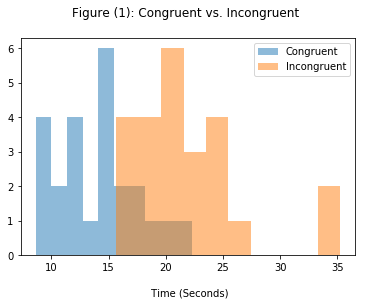

In [33]:
# Build the visualizations here

plt.hist(df.Congruent, alpha = 0.5, label = 'Congruent');
plt.hist(df.Incongruent, alpha=0.5, label = 'Incongruent');
plt.legend();
plt.title('Figure (1): Congruent vs. Incongruent \n');
plt.xlabel('\n Time (Seconds)');

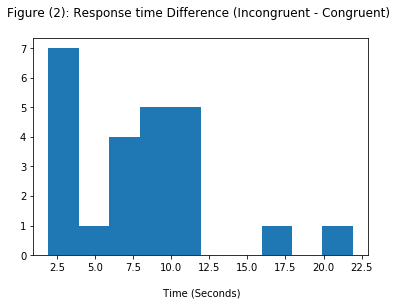

In [35]:
plt.hist(df['Diff']);
plt.legend();
plt.title('Figure (2): Response time Difference (Incongruent - Congruent) \n');
plt.xlabel('\n Time (Seconds)');

To provide a better visualization of the time response difference, we will generate another histogram using `distplot` with probability density estimation from the `seaborn` package. Please note the `distplot` function automatically adjusts the bins for better representation; that explains why it looks different than the histogram generated using `plt.hist`.

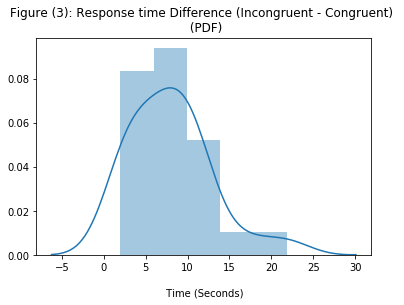

In [53]:
sns.distplot(df['Diff']);
plt.legend();
plt.title('Figure (3): Response time Difference (Incongruent - Congruent) \n (PDF)');
plt.xlabel('\n Time (Seconds)');

Looking at the histograms above, we note that the difference in the respose time is Not normally distributed (right-skewed). To confirm our observation, we will perform Shapiro-Wilk test to test data normality, it tests the null hypothesis that a sample came from a normally distributed population. if the p-value is less than the chosen alpha level (we will assume $\alpha = 0.05$), then the null hypothesis is rejected and there is evidence that the data tested are not from a normally distributed population

In [54]:
stats.shapiro(df['Diff'])

(0.9104195833206177, 0.03601718321442604)

According Based on the `shapiro` function, we note that:

pvalue = 0.0360 < 0.05
    
Therefore, the data is not normaly distributed.

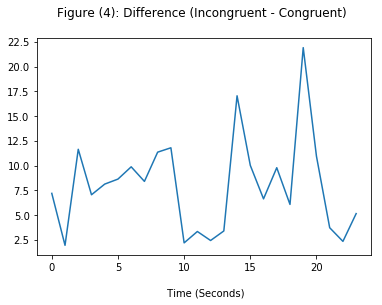

In [37]:
plt.plot(df['Diff'])
plt.title('Figure (4): Difference (Incongruent - Congruent) \n');
plt.xlabel('\n Time (Seconds)');

By looking at the histograms and line chart above, we note that the time difference (I - C) is always positive, in other words: in the selected sample, the incongruent response time is greater than the congruent response time with a minimum of **1.95** seconds and a maximum of **21.919** seconds.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [11]:
# Perform the statistical test here

stats.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

In [12]:
# calculate t_critical for a confidence level of 95% and degree of freedom (DF) = 23 (sample size - 1)

t_critical = stats.t.ppf(q = 0.975, df=23)
t_critical

2.0686576104190406

Based on the `ttest_rel` and `ppf` functions, we note that:

- for a confidence level: 95% and degree of freedom (DF) = 23 (sample size - 1):
    - t_critical = 2.0686
    - t_statistic = -8.0207
    - pvalue = 4.103e-08 << 1

Based on the results above, we will reject **$H_{0}$** in favor of **$H_{1}$** which states that there is a significant difference between the population average response time in the Incongruent scenario and the population average response time in the Congruent scenario which is consistent with the initial data assessment conducted above.

**References**:

<br>[Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect)
<br>[scipy.stats.t](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html)
<br>[Shapiro–Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)
<br>[scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html)
<br>[Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
<br>[Types of Statistical Tests](https://cyfar.org/types-statistical-tests)
<br>[Hypothesis Test: Difference Between Means](http://stattrek.com/hypothesis-test/difference-in-means.aspx?Tutorial=AP)